In [1]:
import os
import os.path as path
import sys

EXAMPLE_DIR = path.abspath("")
GIT_DIR = path.split(EXAMPLE_DIR)[0]
SRC_DIR = path.join(GIT_DIR, "src")
sys.path.append(SRC_DIR)

In [2]:
from models import *

In [3]:
AREA = 90
VOLUME = 5
CONFIG_FILE = f'{EXAMPLE_DIR}/config_slc.json'

In [4]:
simulation = SimulationEnvironment(AREA, VOLUME, CONFIG_FILE)
simulation.collector_area
simulation.storage_tank_volume

5

In [5]:
df = simulation.environment_conditions
df

,poa_global,solar_elevation,temp_air,wind_speed,Int
time,,,,,
2005-12-31 17:00:00,0.00,0.00,4.71,3.66,0
2005-12-31 18:00:00,0.00,0.00,5.28,3.76,0
2005-12-31 19:00:00,0.00,0.00,5.85,3.86,0
2005-12-31 20:00:00,0.00,0.00,6.42,3.96,0
2005-12-31 21:00:00,0.00,0.00,6.32,4.22,0
...,...,...,...,...,...
2006-12-31 12:00:00,535.20,25.84,-3.33,1.04,0
2006-12-31 13:00:00,350.11,25.85,-2.63,0.91,0
2006-12-31 14:00:00,367.96,22.89,-1.92,0.77,0


In [6]:
oct = df[(df.index.month == 10) & (df.index.day==29)]

AUXILIARY ENERGY 867.495 MJ
TOTAL_ENERGY 31.980 MJ
THE SOLAR FRACTION IS: 0.963


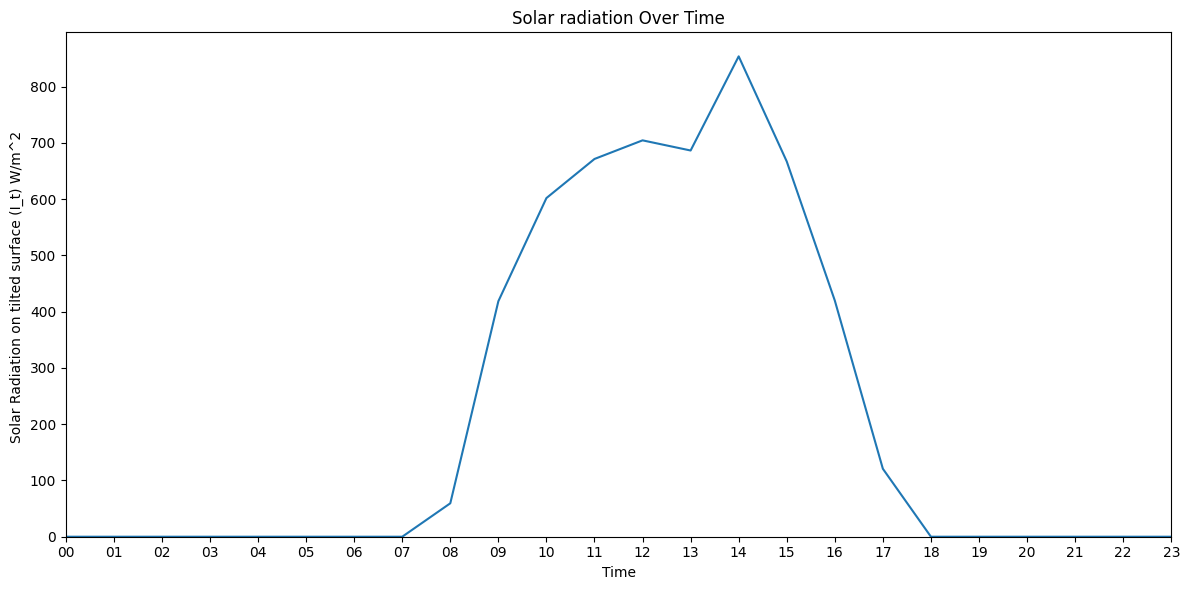

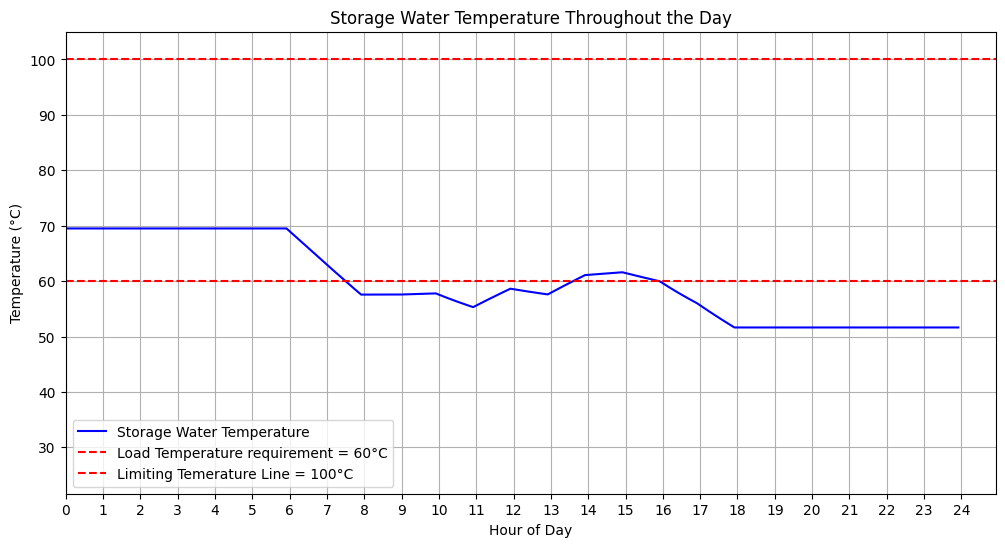

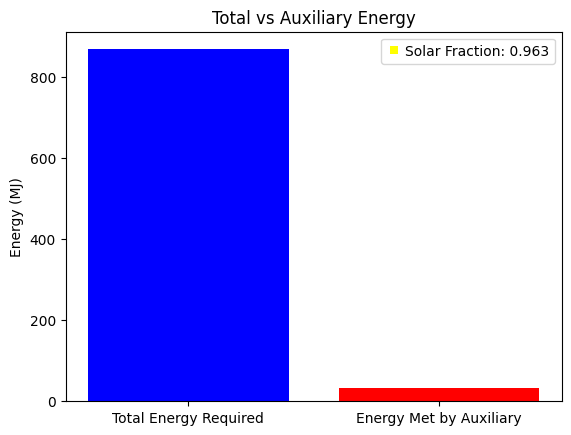

In [7]:
simulation.simulate_single_day(month=10, day=29)

AUXILIARY ENERGY 33.827 GJ
TOTAL_ENERGY 20.713 GJ
THE SOLAR FRACTION IS: 0.388


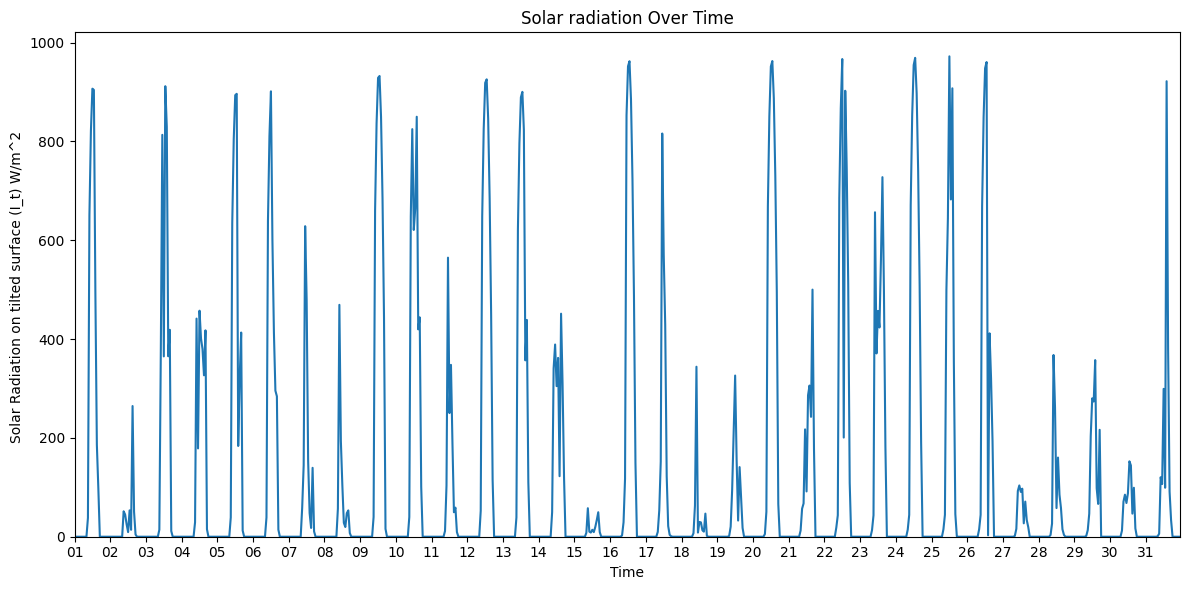

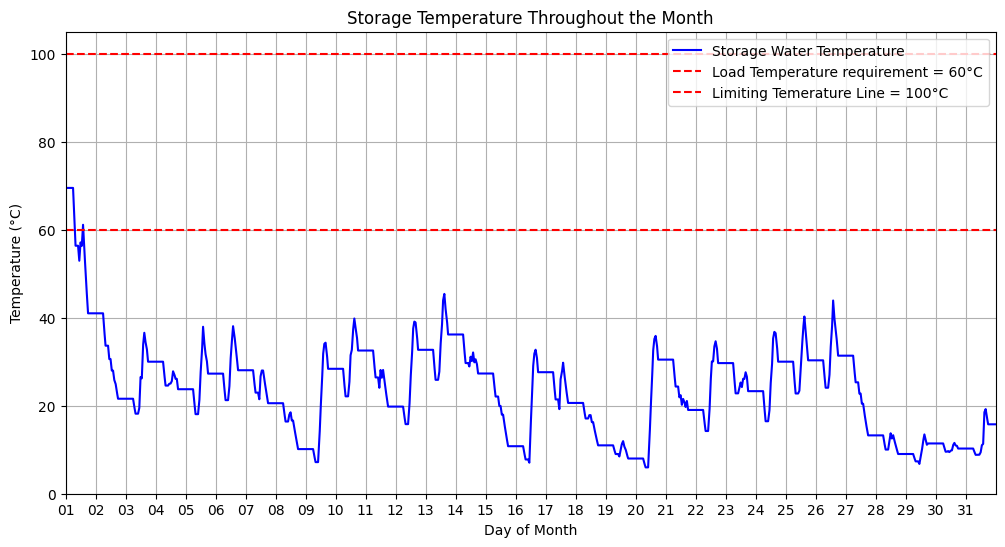

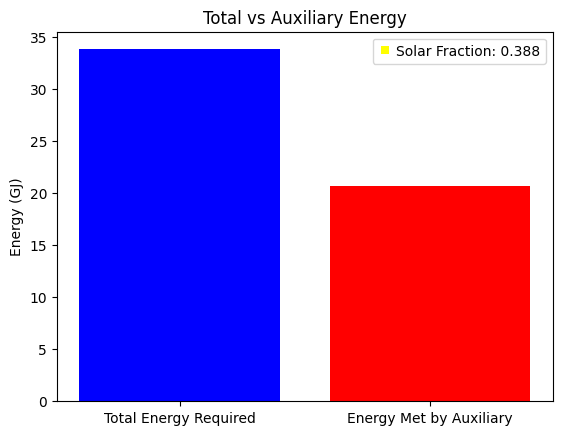

In [8]:
simulation.simulate_month(month=1)

AUXILIARY ENERGY 319.387 GJ
TOTAL_ENERGY 113.727 GJ
THE SOLAR FRACTION IS: 0.644


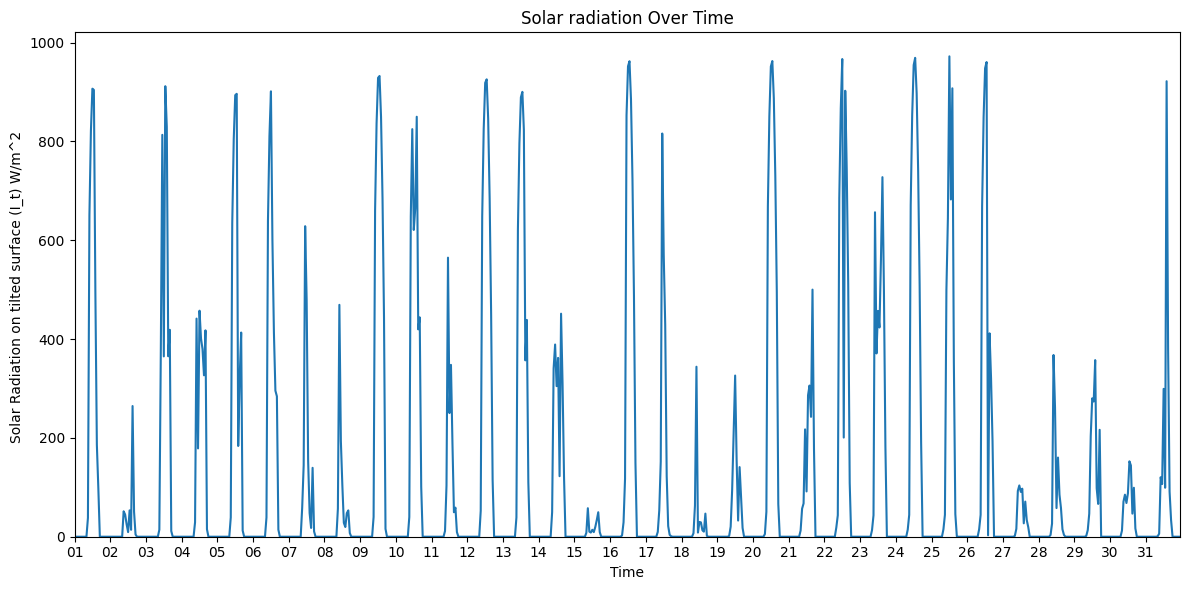

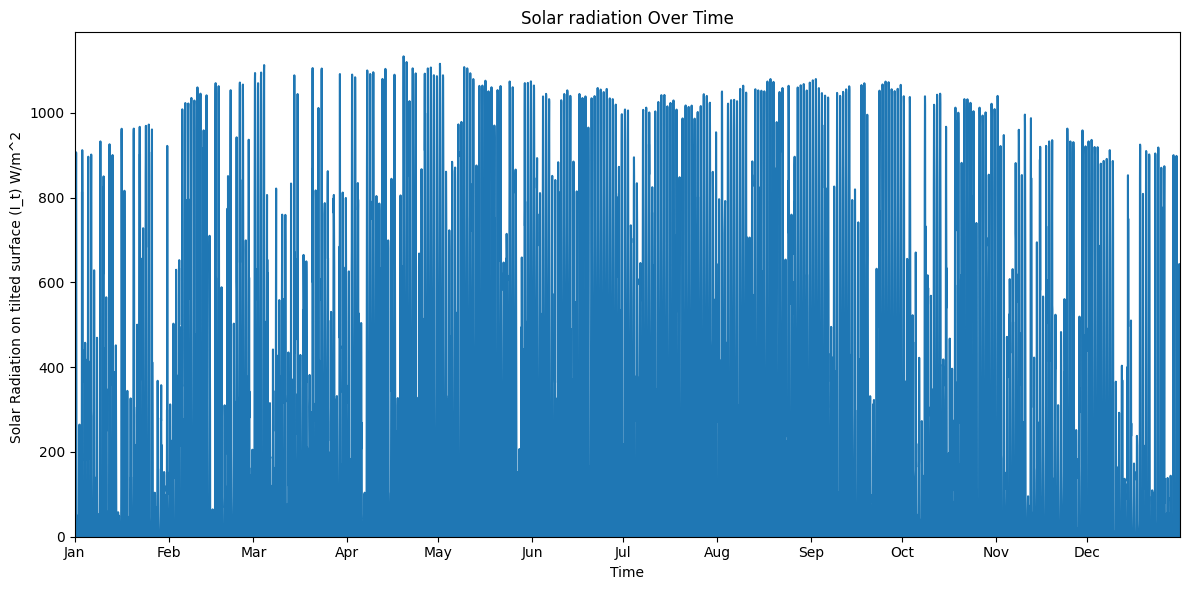

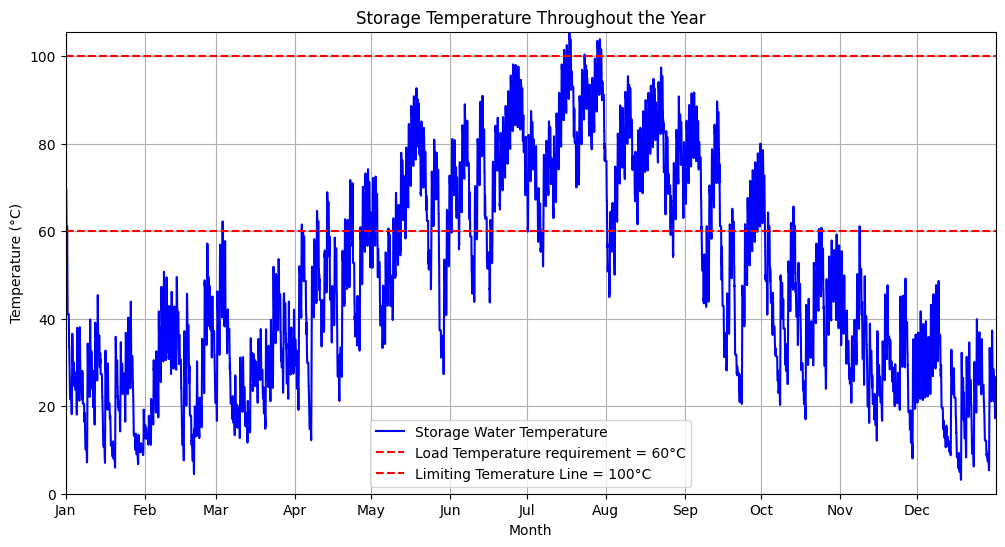

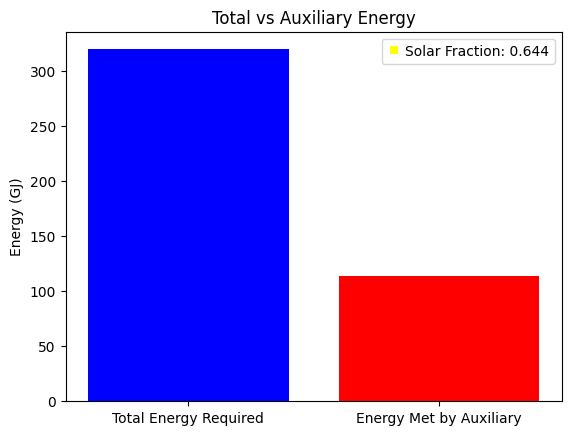

In [9]:
simulation.simulate_entire_year()